In [31]:
#Essential Constants
from scipy.constants import h, c, hbar, u, k

#Imports from other script/s
from ipynb.fs.full.Conversions_Epimetheus import * #Conversion Doc
from ipynb.fs.full.Atomic_Mass_Key import element #Mass Key File
from ipynb.fs.full.EpiPan_Functions import * #All Functions

#General Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import itertools
import pandas as pd

In [32]:
#Import Desired PES
from ipynb.fs.full.O3_PES_fortran_JT import PES

In [33]:
#Import Desired Data // From S&MPO
primedata = pd.read_csv("O3_888_SPEC_SMPO.txt", sep="\s+", header=None, skiprows=5)

prime_freq = primedata.loc[:,2]
prime_freq = np.array(prime_freq)
    
prime_intensity = primedata.loc[:,3]
prime_intensity = np.array(prime_intensity)
prime_intensity = np.divide(prime_intensity, sum(prime_intensity))

### Manual Inputs

In [34]:
#Temperature
T = 300

In [35]:
molecule = ["O-18", "O-18", "O-18"]

In [36]:
#Positions/Bond Lengths/Angles
r1 = 1.28
r2 = r1
alpha = 116.78 
#Fortran values
r1 =1.27200
r2 = r1
alpha =116.7800
coord = coord_triatomic(alpha, r1, r2)

In [37]:
mass = ((element[molecule[0]] * u * kg_to_me), 
            (element[molecule[1]] * u * kg_to_me), 
            (element[molecule[2]] * u * kg_to_me))

In [38]:
B, I, COMcoord = rot_inertia_rcom(coord, mass)

R_com [0.        0.4444661 0.       ]
r_COMalpha [[-1.08328032  0.22223305  0.        ]
 [ 0.         -0.4444661   0.        ]
 [ 1.08328032  0.22223305  0.        ]]


### Calculations 

In [39]:
Key, Pos =  Key_and_Pos(coord)

In [40]:
PES_func = PES(Key, Pos, molecule)

In [41]:
Hess = Hess_CART(Key, Pos, PES, molecule)

In [42]:
Hess_MWC_fin = Hess_MWC(Hess, Key, mass)

In [43]:
eigvals, eigvecs, Hess_diag_au, Hess_diag_wn, fundamentals_au, fundamentals_wn = eigval_eigvec(Hess_MWC_fin)

In [44]:
eigvecs_UMW = UMW(eigvecs, mass, Key)

In [45]:
displace_vec, displace_val= displace_vec_and_val(eigvals, eigvecs_UMW)

In [46]:
cubic = cubic_CART(Key, Pos, displace_vec, displace_val, PES, molecule)

In [47]:
quartic = quartic_CART(Key, Pos, displace_vec, displace_val, PES, molecule)

In [48]:
sigma = sigma_ij(displace_val, cubic)

In [49]:
deltaETOSH = deltaETOSH_ij(displace_val, cubic, quartic, sigma)

In [50]:
allrot = all_rot_const(displace_vec, sigma, coord, mass, bohr_to_angstrom)

R_com [ 6.80575657e-08  4.44466083e-01 -2.96561227e-19]
r_COMalpha [[-1.08624100e+00  2.20690468e-01 -5.91945917e-19]
 [-9.54724563e-03 -4.47259263e-01  2.95482341e-19]
 [ 1.09578825e+00  2.26568795e-01  2.96463576e-19]]
R_com [0.00000000e+00 4.44466100e-01 7.42942802e-33]
r_COMalpha [[-1.08328032e+00  2.22233050e-01  1.48496952e-32]
 [ 6.66846975e-17 -4.44466100e-01 -7.42110945e-33]
 [ 1.08328032e+00  2.22233050e-01 -7.42858571e-33]]
R_com [ 4.12887020e-08  4.44466087e-01 -2.82099433e-19]
r_COMalpha [[-1.08649041e+00  2.21256551e-01 -5.63262895e-19]
 [-5.79205816e-03 -4.46079325e-01  2.81242370e-19]
 [ 1.09228247e+00  2.24822774e-01  2.82020525e-19]]


In [51]:
key_data = data_file_maker_triatomic(displace_val, deltaETOSH, B, allrot, "O3_888_JT")

   harmonic_wn  anharmonic_wn     B_000   B_Freq1   B_Freq2   B_Freq3
0  1069.816636    1058.121843  3.160645  3.121934  3.160645  3.138064
1  1027.545723     989.121582  0.399055  0.393381  0.399055  0.394581
2   674.464891     662.862427  0.354319  0.349360  0.354319  0.350508


In [52]:
J_max_arr, A_rot, B_rot, C_rot = J_max_func(B, T)

In [53]:
P_nu1, P_rot_nu1, P_index_nu1 = asytop_v_P(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])

Q_nu1, Q_rot_nu1, Q_index_nu1 = asytop_v_Q(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])

R_nu1, R_rot_nu1, R_index_nu1 = asytop_v_R(1, J_max_arr, "B", deltaETOSH[0] , A_rot, allrot[0][0], B_rot, allrot[0][1], C_rot, allrot[0][2])
##

100%|██████████| 77/77 [00:10<00:00,  7.06it/s] 


In [54]:
P_nu2, P_rot_nu2, P_index_nu2 = asytop_v_P(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])

Q_nu2, Q_rot_nu2, Q_index_nu2 = asytop_v_Q(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])

R_nu2, R_rot_nu2, R_index_nu2 = asytop_v_R(1, J_max_arr, "B", deltaETOSH[2] , A_rot, allrot[2][0], B_rot, allrot[2][1], C_rot, allrot[2][2])
##

100%|██████████| 77/77 [00:11<00:00,  6.84it/s] 


In [55]:
P_nu3, P_rot_nu3, P_index_nu3 = asytop_v_P(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])

Q_nu3, Q_rot_nu3, Q_index_nu3 = asytop_v_Q(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])

R_nu3, R_rot_nu3, R_index_nu3 = asytop_v_R(2, J_max_arr, "A", deltaETOSH[1] , A_rot, allrot[1][0], B_rot, allrot[1][1], C_rot, allrot[1][2])
##

100%|██████████| 77/77 [00:11<00:00,  6.85it/s] 


In [56]:
nu1_I = Norm_I(P_rot_nu1, P_index_nu1, Q_rot_nu1, Q_index_nu1, R_rot_nu1, R_index_nu1, T, 1, 0.039)
##

In [57]:
nu2_I = Norm_I(P_rot_nu2, P_index_nu2, Q_rot_nu2, Q_index_nu2, R_rot_nu2, R_index_nu2, T, 1, 0.047)
##

In [58]:
nu3_I = Norm_I(P_rot_nu3, P_index_nu3, Q_rot_nu3, Q_index_nu3, R_rot_nu3, R_index_nu3, T, 1, 1)
##

In [59]:
Final_I = Fin_I(nu1_I[0], nu1_I[1],nu1_I[2], nu2_I[0], nu2_I[1], nu2_I[2], nu3_I[0], nu3_I[1], nu3_I[2])
##

P_nu1_13DaLo_888 = P_nu1
P_nu1_13DaLo_888_int = Final_I[0]
%store P_nu1_13DaLo_888
%store P_nu1_13DaLo_888_int

Q_nu1_13DaLo_888 = Q_nu1
Q_nu1_13DaLo_888_int = Final_I[1]
%store Q_nu1_13DaLo_888
%store Q_nu1_13DaLo_888_int

R_nu1_13DaLo_888 = R_nu1
R_nu1_13DaLo_888_int = Final_I[2]
%store R_nu1_13DaLo_888
%store R_nu1_13DaLo_888_int

P_nu2_13DaLo_888 = P_nu2
P_nu2_13DaLo_888_int = Final_I[3]
%store P_nu2_13DaLo_888
%store P_nu2_13DaLo_888_int

Q_nu2_13DaLo_888 = Q_nu2
Q_nu2_13DaLo_888_int = Final_I[4]
%store Q_nu2_13DaLo_888
%store Q_nu2_13DaLo_888_int

R_nu2_13DaLo_888 = R_nu2
R_nu2_13DaLo_888_int = Final_I[5]
%store R_nu2_13DaLo_888
%store R_nu2_13DaLo_888_int

P_nu3_13DaLo_888 = P_nu3
P_nu3_13DaLo_888_int = Final_I[6]
%store P_nu3_13DaLo_888
%store P_nu3_13DaLo_888_int

Q_nu3_13DaLo_888 = Q_nu3
Q_nu3_13DaLo_888_int = Final_I[7]
%store Q_nu3_13DaLo_888
%store Q_nu3_13DaLo_888_int

R_nu3_13DaLo_888 = R_nu3
R_nu3_13DaLo_888_int = Final_I[8]
%store R_nu3_13DaLo_888
%store R_nu3_13DaLo_888_int

nu1_origin_888_13DaLo = deltaETOSH[0]
%store nu1_origin_888_13DaLo
nu2_origin_888_13DaLo = deltaETOSH[1]
%store nu2_origin_888_13DaLo
nu3_origin_888_13DaLo = deltaETOSH[2]
%store nu3_origin_888_13DaLo

HITRAN_freq_888_13DaLo = prime_freq
%store HITRAN_freq_888_13DaLo

HITRAN_int_888_13DaLo = prime_intensity
%store HITRAN_int_888_13DaLo

In [30]:
#20GaTe
exp_B = (3.158, 0.396, 0.351)
exp_J_max_arr, exp_A_rot, exp_B_rot, exp_C_rot = J_max_func(exp_B, T)

mode_100 = 1041.6
A_mode_100 = 3.161
B_mode_100 = 0.394 
C_mode_100 = 0.349

exp_P_nu1, exp_P_rot_nu1, exp_P_index_nu1 = asytop_v_P(1, exp_J_max_arr, "B", mode_100 , exp_A_rot, A_mode_100, exp_B_rot, B_mode_100, exp_C_rot, C_mode_100)
exp_Q_nu1, exp_Q_rot_nu1, exp_Q_index_nu1 = asytop_v_Q(1, exp_J_max_arr, "B", mode_100 , exp_A_rot, A_mode_100, exp_B_rot, B_mode_100, exp_C_rot, C_mode_100)
exp_R_nu1, exp_R_rot_nu1, exp_R_index_nu1 = asytop_v_R(1, exp_J_max_arr, "B", mode_100 , exp_A_rot, A_mode_100, exp_B_rot, B_mode_100, exp_C_rot, C_mode_100)

mode_010 = 661.5
A_mode_010 = 3.203
B_mode_010 = 0.395 
C_mode_010 = 0.349

exp_P_nu2, exp_P_rot_nu2, exp_P_index_nu2 = asytop_v_P(1, exp_J_max_arr, "B", mode_010 , exp_A_rot, A_mode_010, exp_B_rot, B_mode_010, exp_C_rot, C_mode_010)
exp_Q_nu2, exp_Q_rot_nu2, exp_Q_index_nu2 = asytop_v_Q(1, exp_J_max_arr, "B", mode_010 , exp_A_rot, A_mode_010, exp_B_rot, B_mode_010, exp_C_rot, C_mode_010)
exp_R_nu2, exp_R_rot_nu2, exp_R_index_nu2 = asytop_v_R(1, exp_J_max_arr, "B", mode_010 , exp_A_rot, A_mode_010, exp_B_rot, B_mode_010, exp_C_rot, C_mode_010)

mode_001 = 984.8
A_mode_001 = 3.114 
B_mode_001 = 0.393 
C_mode_001 = 0.348

exp_P_nu3, exp_P_rot_nu3, exp_P_index_nu3 = asytop_v_P(2, exp_J_max_arr, "A", mode_001 , exp_A_rot, A_mode_001, exp_B_rot, B_mode_001, exp_C_rot, C_mode_001)
exp_Q_nu3, exp_Q_rot_nu3, exp_Q_index_nu3 = asytop_v_Q(2, exp_J_max_arr, "A", mode_001 , exp_A_rot, A_mode_001, exp_B_rot, B_mode_001, exp_C_rot, C_mode_001)
exp_R_nu3, exp_R_rot_nu3, exp_R_index_nu3 = asytop_v_R(2, exp_J_max_arr, "A", mode_001 , exp_A_rot, A_mode_001, exp_B_rot, B_mode_001, exp_C_rot, C_mode_001)

exp_nu1_I = Norm_I(exp_P_rot_nu1, exp_P_index_nu1, exp_Q_rot_nu1, exp_Q_index_nu1, exp_R_rot_nu1, exp_R_index_nu1, T, 1, 0.039)
##
exp_nu2_I = Norm_I(exp_P_rot_nu2, exp_P_index_nu2, exp_Q_rot_nu2, exp_Q_index_nu2, exp_R_rot_nu2, exp_R_index_nu2, T, 1, 0.047)
##
exp_nu3_I = Norm_I(exp_P_rot_nu3, exp_P_index_nu3, exp_Q_rot_nu3, exp_Q_index_nu3, exp_R_rot_nu3, exp_R_index_nu3, T, 1, 1)
##
exp_Final_I = Fin_I(exp_nu1_I[0], exp_nu1_I[1], exp_nu1_I[2], exp_nu2_I[0], exp_nu2_I[1], exp_nu2_I[2], exp_nu3_I[0], exp_nu3_I[1], exp_nu3_I[2])
##

100%|██████████| 77/77 [00:11<00:00,  6.51it/s] 


In [31]:
harm_B = (B[0], B[1], B[2])
harm_J_max_arr, harm_A_rot, harm_B_rot, harm_C_rot = J_max_func(harm_B, T)

harm_P_nu1, harm_P_rot_nu1, harm_P_index_nu1 = asytop_v_P(1, harm_J_max_arr, "B", fundamentals_wn[0] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)
harm_Q_nu1, harm_Q_rot_nu1, harm_Q_index_nu1 = asytop_v_Q(1, harm_J_max_arr, "B", fundamentals_wn[0] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)
harm_R_nu1, harm_R_rot_nu1, harm_R_index_nu1 = asytop_v_R(1, harm_J_max_arr, "B", fundamentals_wn[0] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)

harm_P_nu2, harm_P_rot_nu2, harm_P_index_nu2 = asytop_v_P(1, harm_J_max_arr, "B", fundamentals_wn[2] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)
harm_Q_nu2, harm_Q_rot_nu2, harm_Q_index_nu2 = asytop_v_Q(1, harm_J_max_arr, "B", fundamentals_wn[2] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)
harm_R_nu2, harm_R_rot_nu2, harm_R_index_nu2 = asytop_v_R(1, harm_J_max_arr, "B", fundamentals_wn[2] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)

harm_P_nu3, harm_P_rot_nu3, harm_P_index_nu3 = asytop_v_P(2, harm_J_max_arr, "A", fundamentals_wn[1] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)
harm_Q_nu3, harm_Q_rot_nu3, harm_Q_index_nu3 = asytop_v_Q(2, harm_J_max_arr, "A", fundamentals_wn[1] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)
harm_R_nu3, harm_R_rot_nu3, harm_R_index_nu3 = asytop_v_R(2, harm_J_max_arr, "A", fundamentals_wn[1] , harm_A_rot, harm_A_rot, harm_B_rot, harm_B_rot, harm_C_rot, harm_C_rot)


harm_nu1_I = Norm_I(harm_P_rot_nu1, harm_P_index_nu1, harm_Q_rot_nu1, harm_Q_index_nu1, harm_R_rot_nu1, harm_R_index_nu1, T, 1, 0.039)
##
harm_nu2_I = Norm_I(harm_P_rot_nu2, harm_P_index_nu2, harm_Q_rot_nu2, harm_Q_index_nu2, harm_R_rot_nu2, harm_R_index_nu2, T, 1, 0.047)
##
harm_nu3_I = Norm_I(harm_P_rot_nu3, harm_P_index_nu3, harm_Q_rot_nu3, harm_Q_index_nu3, harm_R_rot_nu3, harm_R_index_nu3, T, 1, 1)
##
harm_Final_I = Fin_I(harm_nu1_I[0], harm_nu1_I[1], harm_nu1_I[2], harm_nu2_I[0], harm_nu2_I[1], harm_nu2_I[2], harm_nu3_I[0], harm_nu3_I[1], harm_nu3_I[2])
##

100%|██████████| 77/77 [00:12<00:00,  5.96it/s] 


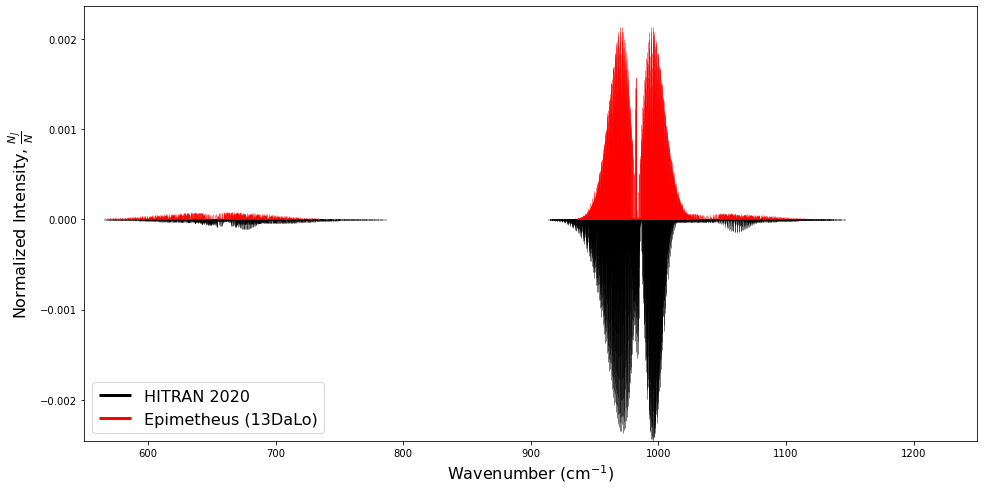

In [32]:
plt.figure(figsize=(16,8))
plt.vlines(prime_freq,0, -prime_intensity, color="k", label="HITRAN 2020", linewidth=.5)

plt.vlines(P_nu1, 0, Final_I[0], "red", label="Epimetheus (18PoZo)", linewidth=.5)
plt.vlines(Q_nu1, 0, Final_I[1], "red", linewidth=.5)
plt.vlines(R_nu1, 0, Final_I[2], "red", linewidth=.5)

plt.vlines(P_nu2, 0, Final_I[3], "red", linewidth=.5)
plt.vlines(Q_nu2, 0, Final_I[4], "red", linewidth=.5)
plt.vlines(R_nu2, 0, Final_I[5], "red", linewidth=.5)

plt.vlines(P_nu3, 0, Final_I[6], "red", linewidth=.5)
plt.vlines(Q_nu3, 0, Final_I[7], "red", linewidth=.5)
plt.vlines(R_nu3, 0, Final_I[8], "red", linewidth=.5)

plt.xlim(550, 1250)
plt.ylim(ymin=-max(prime_intensity))
plt.xlabel(r"Wavenumber (cm$^{-1}$)", fontsize=16)
plt.ylabel(r"Normalized Intensity, $\frac{N_J}{N}$", fontsize=16)

legend = plt.legend(loc = 'lower left', fontsize=16)
for handl in legend.legendHandles:
    handl.set_linewidth(3)

plt.savefig(f"EPI_O3_888_18PoZo_HITRAN2020_{T}K.pdf")

plt.show()

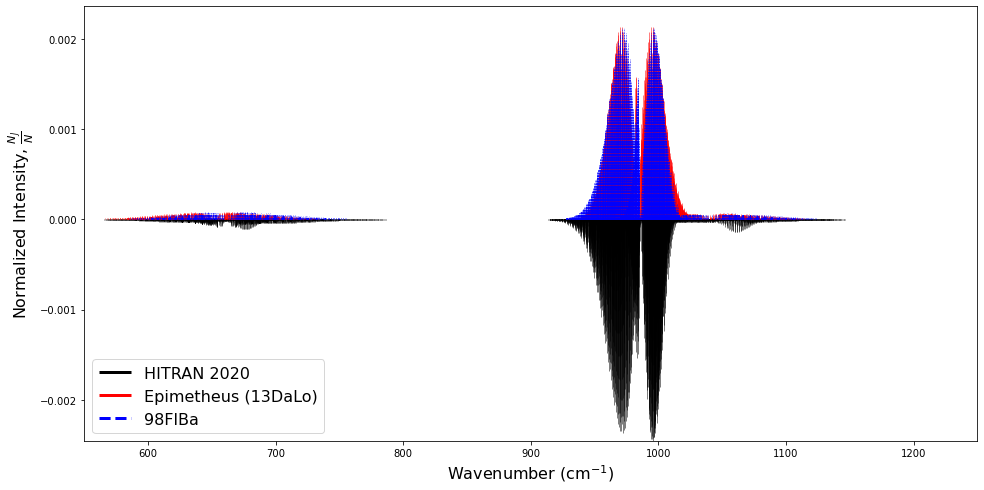

In [33]:
plt.figure(figsize=(16,8))
plt.vlines(prime_freq,0, -prime_intensity, color="k", label="HITRAN 2020", linewidth=.5)

plt.vlines(P_nu1, 0, Final_I[0], "red", label="Epimetheus (18PoZo)", linewidth=.5)
plt.vlines(Q_nu1, 0, Final_I[1], "red", linewidth=.5)
plt.vlines(R_nu1, 0, Final_I[2], "red", linewidth=.5)

plt.vlines(P_nu2, 0, Final_I[3], "red", linewidth=.5)
plt.vlines(Q_nu2, 0, Final_I[4], "red", linewidth=.5)
plt.vlines(R_nu2, 0, Final_I[5], "red", linewidth=.5)

plt.vlines(P_nu3, 0, Final_I[6], "red", linewidth=.5)
plt.vlines(Q_nu3, 0, Final_I[7], "red", linewidth=.5)
plt.vlines(R_nu3, 0, Final_I[8], "red", linewidth=.5)

plt.vlines(exp_P_nu1, 0, exp_Final_I[0], "blue",linestyle='dashed', label="98FlBa", linewidth=.5)
plt.vlines(exp_Q_nu1, 0, exp_Final_I[1], "blue",linestyle='dashed', linewidth=.5)
plt.vlines(exp_R_nu1, 0, exp_Final_I[2], "blue",linestyle='dashed', linewidth=.5)

plt.vlines(exp_P_nu2, 0, exp_Final_I[3], "blue",linestyle='dashed', linewidth=.5)
plt.vlines(exp_Q_nu2, 0, exp_Final_I[4], "blue",linestyle='dashed', linewidth=.5)
plt.vlines(exp_R_nu2, 0, exp_Final_I[5], "blue",linestyle='dashed', linewidth=.5)

plt.vlines(exp_P_nu3, 0, exp_Final_I[6], "blue",linestyle='dashed', linewidth=.5)
plt.vlines(exp_Q_nu3, 0, exp_Final_I[7], "blue",linestyle='dashed', linewidth=.5)
plt.vlines(exp_R_nu3, 0, exp_Final_I[8], "blue",linestyle='dashed', linewidth=.5)

plt.xlim(550, 1250)
plt.ylim(ymin=-max(prime_intensity))
plt.xlabel(r"Wavenumber (cm$^{-1}$)", fontsize=16)
plt.ylabel(r"Normalized Intensity, $\frac{N_J}{N}$", fontsize=16)

legend = plt.legend(loc = 'lower left', fontsize=16)
for handl in legend.legendHandles:
    handl.set_linewidth(3)

plt.savefig(f"EPI_O3_888_18PoZo_HITRAN2020_exp_{T}K.pdf")

plt.show()

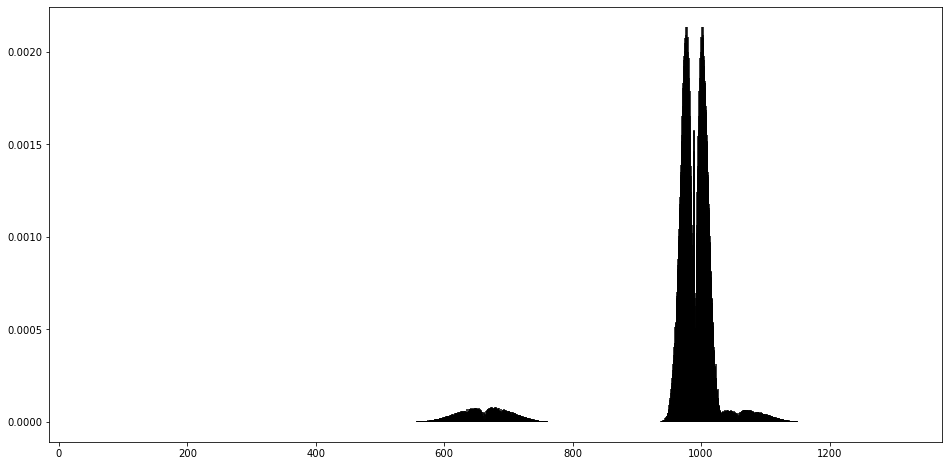

In [60]:
Pos = np.concatenate((P_nu1, Q_nu1, R_nu1, P_nu2, Q_nu2, R_nu2, P_nu3, Q_nu3, R_nu3))
Pos = np.reshape(Pos, (len(Pos),1))
Int = np.concatenate((Final_I[0], Final_I[1], Final_I[2], Final_I[3], Final_I[4], Final_I[5], Final_I[6], Final_I[7], Final_I[8]))
Int = np.reshape(Int, (len(Int),1))
Pos_and_Int = np.concatenate((Pos,Int), axis=1)
np.savetxt("O3_888_18PoZo_outputdata_WN_and_INT.txt", Pos_and_Int, delimiter=",")
#Quick double check of the data saved
plt.figure(figsize=(16,8))
plt.vlines(Pos_and_Int[:,0],0,Pos_and_Int[:,1])